In [ ]:
#표준정규화

import numpy as np
import pandas as pd

#샘플데이터 생성 
meat_consumption_korea = 5*np.random.randn(1000)+53.9
meat_consumption_japan = 4*np.random.randn(1000)+32.7

#데이터 프레임 생성
df = pd.DataFrame({"한국인":meat_consumption_korea, "일본인":meat_consumption_japan})
df.head()


In [ ]:
#histogram을 통한 시각화
import matplotlib.pyplot as plt

plt.hist(meat_consumption_korea)
plt.xlabel('Korea')
plt.show()

In [ ]:
plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [ ]:
#Z-normalization

#import numpy as np
#import pandas as pd
import scipy.stats as ss

#scipy.stats.zscore attribute 사용
df["한국인 정규화"] = ss.zscore(meat_consumption_korea)
df["일본인 정규화"] = ss.zscore(meat_consumption_japan)

df.head()


In [ ]:
#(x-np.mean(x))/np.std(x)
df["한국인 정규화2"] = (meat_consumption_korea -  np.mean(meat_consumption_korea))/np.std(meat_consumption_korea)
df["일본인 정규화2"] = (meat_consumption_japan -  np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

df.head()


In [ ]:
plt.hist(df["한국인 정규화"])
plt.xlabel('korea')
plt.show()

plt.hist(df["일본인 정규화"])
plt.xlabel('japan')
plt.show()

In [ ]:
#using sklearn.preprocessing.StandScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["한국인 정규화3"] = scaler.fit_transform(df[["한국인"]])

scaler = StandardScaler()
df["일본인 정규화3"] = scaler.fit_transform(df[["일본인"]])

df.head()

In [ ]:
#min-max normalization

df["한국인 MinMax"] = (df["한국인"]-np.min(df["한국인"]))/(np.max(df["한국인"])-np.min(df["한국인"]))
df["일본인 MinMax"] = (df["일본인"]-np.min(df["일본인"]))/(np.max(df["일본인"])-np.min(df["일본인"])
                                                  )
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["한국인 MinMax2"] = scaler.fit_transform(df[["한국인"]])

scaler = MinMaxScaler()
df["일본인 MinMax2"] = scaler.fit_transform(df[["일본인"]])

df.head()


In [ ]:
#skweness

df = pd.read_csv('USJudgeRatings.csv')
df.head(10)

In [ ]:
import scipy.stats as ss
print(ss.skew(df["CONT"]))
print(ss.skew(df["PHYS"]))

In [ ]:
#양의 왜도의 경우 log를 씌워서 정규화
df["CONT1"] = np.log(df["CONT"])
#음의 왜도의 경우 log(max(x+1)-x)
df["PHYS1"] = np.log(max(df["PHYS"]+1)-df["PHYS"]) 
print(ss.skew(df["CONT1"]))
print(ss.skew(df["PHYS1"]))

In [ ]:
#범주화

In [ ]:
df = []

while True:
    tmp = input()
    if tmp == "": break
    else:
        df.append([tmp.split()[0], int(tmp.split()[1])])

df = pd.DataFrame(df)
df.columns=['이름','수학점수']

In [ ]:
plt.hist(df["수학점수"], bins=5, range=[50,100], rwidth=0.9)

In [ ]:
#조건을 사용해서 구간을 직접 지정 -> 규칙이 존재하지 않는 경우
df["등급"] = 0
df.loc[df["수학점수"]<60,"등급"]="F"
df.loc[(df["수학점수"]>=60) & (df["수학점수"]<70) ,"등급"]="D"
df.loc[(df["수학점수"]>=70) & (df["수학점수"]<80) ,"등급"]="C"
df.loc[(df["수학점수"]>=80) & (df["수학점수"]<90) ,"등급"]="B"
df.loc[(df["수학점수"]>=90) & (df["수학점수"]<100) ,"등급"]="A"

df

In [ ]:
#cut함수 사용
df["등급"] = pd.cut(x=df["수학점수"],
              bins=[0,60,70,80,90,100],
              labels=["F","D","C","B","A"],
              include_lowest=True)
df

In [ ]:
#qcut함수 - 각 범주에 균등한 수의 데이터가 채워지도록 구간을 설정
df["등급_qcut"] = pd.qcut(x=df["수학점수"],q=5,labels=["F","D","C","B","A"])
df

In [ ]:
#PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("iris.csv")

#범주형 변수 제거
df = iris.drop(["variety"], axis=1)
df.head()

In [ ]:
#PCA를 할 때 변수 간 스케일이 차이가 나면 스케일이 큰 변수가 주성분에 영향을 많이 주기 때문에 정규화를 해줘야 한다
from sklearn.preprocessing import StandardScaler

df["sepal.length"] = StandardScaler().fit_transform(df[["sepal.length"]])
df["sepal.width"] = StandardScaler().fit_transform(df[["sepal.width"]])
df["petal.length"] = StandardScaler().fit_transform(df[["petal.length"]])
df["petal.width"] = StandardScaler().fit_transform(df[["petal.width"]])



#apply 메서드를 이용한 간결한 스케일링 적용
scaler = StandardScaler()
df_scaled = df.apply(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten(), axis=0)
df_scaled.columns = df.columns

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape)
print(pca.explained_variance_ratio_)

In [ ]:
help(pca)

In [62]:
#결측처리
df = pd.DataFrame()
x = [14,15,13,14,None,None,19,11,12,18]
df["토론"] = x
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   토론      8 non-null      float64
dtypes: float64(1)
memory usage: 212.0 bytes


In [64]:
print(df.isnull())
print(df["토론"].isnull().sum())

,토론
0,False
1,False
2,False
3,False
4,True
5,True
6,False
7,False
8,False
9,False


In [114]:
titanic = pd.read_csv('titanic.csv')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
#결측대체

#완전분석법 - 해당 행을 삭제
#df.dropna(axis=0): 결측이 있는 모든 행을 삭제
#df.dropna(axis=1): 결측이 있는 모든 열을 삭제
#df.dropna(subset=["Age"],axis=0): Age열에 결측이 있는 모든 행을 삭제
titanic_1 = titanic.dropna(axis=0)
print(titanic_1.isnull().sum().sum())
titanic_1.shape

0


(183, 12)

In [116]:
#평균대치법 - 평균으로 대치
titanic["Age"].isnull().sum() #Age 컬럼의 결측개수
age_mean = titanic["Age"].mean()
titanic["Age"].fillna(age_mean, inplace=True)
print(titanic["Age"].isnull().sum())

0


/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29415/3442760126.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(age_mean, inplace=True)


In [118]:
#최빈값으로 대치
from scipy.stats import mode
print(titanic["Embarked"].isnull().sum())
embarked_mode = titanic["Embarked"].mode()[0] #최빈값
titanic["Embarked"].fillna(embarked_mode, inplace=True)
print(titanic["Embarked"].isnull().sum())

0
0


In [120]:
#인접한 값으로 대치
titanic = pd.read_csv('titanic.csv')
print(titanic["Embarked"].isnull().sum())
titanic["Embarked"].fillna(method='ffill', inplace=True)
print(titanic["Embarked"].isnull().sum())


2
0


/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29415/3038284277.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(method='ffill', inplace=True)
/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29415/3038284277.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  titanic["Embarked"].fillna(method='ffill', inplace=True)


In [126]:
#그룹별 평균으로 대체
titanic = pd.read_csv('titanic.csv')
print(titanic.groupby("Sex")["Age"].mean())
print(titanic.groupby("Pclass")["Age"].mean())

titanic["Age"].fillna(titanic.groupby(["Sex","Pclass"])["Age"].transform('mean'), inplace=True)
titanic.tail()

age_mean_table = titanic.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')
print(age_mean_table)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Pclass          1          2          3
Sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589
Pclass          1          2          3
Sex                                    
female  34.611765  28.722973  21.750000
male    41.281386  30.740707  26.507589


/var/folders/fx/7qldcfl92nb_g9hqp_lrssxm0000gn/T/ipykernel_29415/1255914746.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic.groupby(["Sex","Pclass"])["Age"].transform('mean'), inplace=True)


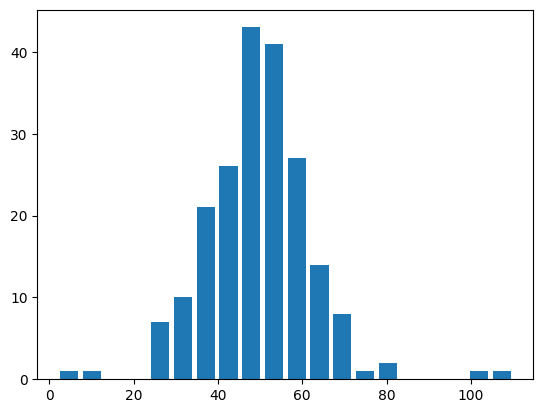

In [127]:
#이상치 처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#평균 50, 표준편차 10, 난수 200개 생성
data = 10*np.random.randn(200)+50 
df = pd.DataFrame({"값":data})

#임의의 이상치 삽입
df.loc[201]=2
df.loc[202]=100
df.loc[203]=10
df.loc[204]=110

#분포 시각화
plt.hist(df["값"],bins=20, rwidth=0.8)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlab'

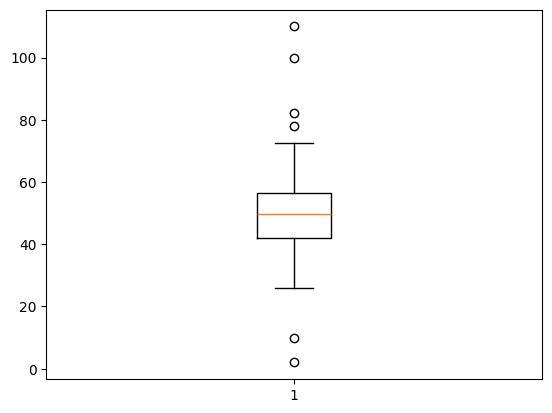

In [129]:
#IQR 방법
plt.boxplot(df["값"])
plt.show()


In [131]:
#dataframe 객체 quantile() 메서드
print(df["값"].quantile(.25))
print(df["값"].quantile(.5))
print(df["값"].quantile(.75))
print("IQR=", df["값"].quantile(.75)-df["값"].quantile(.25))

#dataframe 객체 describe() 메서드
print(df["값"].describe()["25%"])
print(df["값"].describe()["50%"])
print(df["값"].describe()["75%"])
print("IQR=", df["값"].describe()["75%"]-df["값"].describe()["25%"])

41.98139298042847
49.65475849982933
56.32734501929429
IQR= 14.345952038865825
41.98139298042847
49.65475849982933
56.32734501929429
IQR= 14.345952038865825


In [132]:
#이상치 상하한: Q1-1.5*IQR, Q3+1.5*IQR
IQR = df["값"].quantile(.75)-df["값"].quantile(.25)
upper_bound = df["값"].quantile(.75) + 1.5*IQR
lower_bound = df["값"].quantile(.25) - 1.5*IQR
upper_outlier = df[df["값"]>upper_bound]
lower_outlier = df[df["값"]<lower_bound]

print(upper_outlier)
print(lower_outlier)

              값
38    77.942534
124   82.094050
202  100.000000
204  110.000000
        값
201   2.0
203  10.0


In [133]:
from sklearn.preprocessing import StandardScaler
df["Z값"] = StandardScaler().fit_transform(df[["값"]])

In [136]:
df[df["값"]>upper_bound][["값","Z값"]]

,값,Z값
38,77.942534,2.241050
124,82.094050,2.568899
202,100.000000,3.982944
204,110.000000,4.772651


In [137]:
df[df["값"]<lower_bound][["값","Z값"]]

,값,Z값
201,2.0,-3.756184
203,10.0,-3.124419


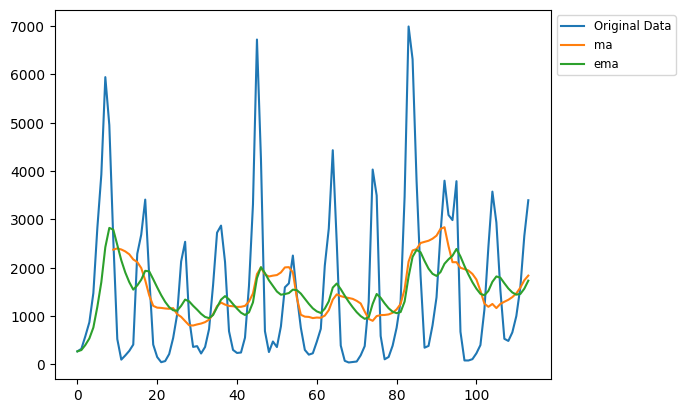

In [151]:
#평활화
df=pd.read_csv("lynx.csv")
df.head(10)

#10년 단순이동평균
df["ma"] = df["value"].rolling(10).mean()
plt.plot(df["value"], label="Original Data")
plt.plot(df["ma"], label="ma")

#지수 가중이동평균: 최근 데이터에 가중치 부여
df["ema"] = df["value"].ewm(10).mean()
plt.plot(df["ema"], label="ema")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize='small')
plt.show()
